# Principle Component Analysis


Sumber : https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

##### Untuk melakukan perhitungan maka diperlukan data yang ingin dihitung. Maka dalam tulisan ini digunakan data artificial yang dibangkitkan dengan menggunakan fungsi gaussian/normal secara acak. Dengan menggunakan modul numpy.multivariate_normal maka kita dapat membangkitkan data acak dengan distribusi normal yang memiliki parameter mean (posisi puncak), dan covariance (lebar distribusi) dengan nilai tertentu

In [210]:
import numpy as np

vector1 = np.array([0,0,0])  #nilai mean dari fungsi normal untuk sample1
cov_vec1 = np.array([[1,0,0],[0,1,0],[0,0,1]])  #nilai covariance dari fungsi normal untuk sample2
sample1 = np.random.multivariate_normal(vector1, cov_vec1, 20).T  # data sample dengan label 1
print('sample 1 = ', sample1.shape)
 
vector2 = np.array([1,1,1])  #nilai mean dari fungsi normal untuk sample2
cov_vec2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #nilai covarian dari fungsi normal untuk sample2
sample2 = np.random.multivariate_normal(vector2, cov_vec2, 20).T # data sample dengan label 2
print('sample 2 = ', sample2.shape)

sample 1 =  (3, 20)
sample 2 =  (3, 20)


#### Jika di plot dalam dua dimensi maka dapat dilihat data artifisial yang telah digenerate terdistribusi secara normal pada grafik.

In [211]:
print('Sample 1 = \n', sample1 , '\n' )
print('Sample 2 = \n', sample2 , '\n' )

Sample 1 = 
 [[-0.88486928 -0.9313656   0.06080357  0.77622049 -0.21920298 -1.16517945
   0.91526667  1.08020963  0.9698266   0.76774139  0.91619767 -0.38565608
  -0.40152322 -0.83259167 -0.11929991  0.57838574  0.55572146 -0.59623356
  -0.9309385  -0.55670031]
 [ 0.71593201 -1.84430335 -0.58593217  0.57386001 -1.89495704  0.47546406
   0.88177259 -0.2993787   0.27191243  0.3592779   1.73263118 -1.75282084
  -0.19891352  1.47871286 -1.08870421 -0.25309908  1.29152959 -0.50269122
   0.48693966 -0.46620458]
 [-1.33533905  1.20124536  0.1231861   0.49019571 -0.49828152  0.1645151
  -2.04589387 -0.47899693  0.82762534 -0.01508866  0.21775483 -0.13964937
   1.79392418  0.55103614 -1.10608398 -1.9779901  -0.79980449 -0.25911642
   0.27592632 -0.16789325]] 

Sample 2 = 
 [[ 0.64874713  1.78016204  0.32365615  1.01083702  2.95322356  0.05069612
   1.76465495  0.71247657 -1.5130597   0.93678928 -0.57026527  1.40953358
   2.58272653 -1.51327929  1.31574603  2.31665863  3.48812474  0.87473094
  -

#### Data sample 1 dan sample 2 dapat diplot dalam bentuk grafik 3 dimensi untuk melihat distibusi masing-masing data.

Populating the interactive namespace from numpy and matplotlib


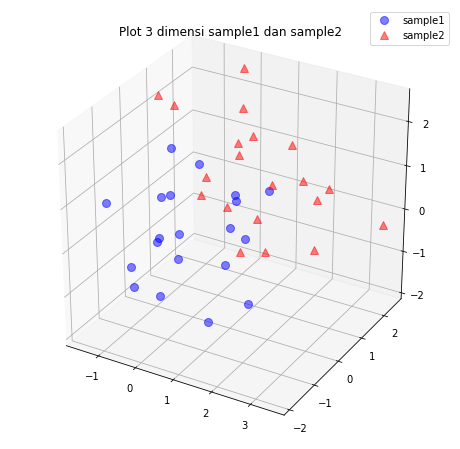

In [212]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(sample1[0,:],sample1[1,:], sample1[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='sample1')
ax.plot(sample2[0,:], sample2[1,:], sample2[2,:], '^', markersize=8, alpha=0.5, color='red', label='sample2')
plt.title('Plot 3 dimensi sample1 dan sample2')
ax.legend(loc='upper right')
plt.show()

#### Data yang telah digenerate kemudian digabung sehingga tidak terbedakan label untuk masing-masing sample.
#### Metode PCA merupakan metode untuk mengklasifikasikan data dengan cara mereduksi dimensi pada data.
#### Dalam tulisan ini data yang digenerate berdimensi 3, sehingga selanjutnya akan direduksi menjadi data berdimensi 2 sehingga dapat diplot dalam grafik 2 dimensi dan dilihat klasifikasi data.

In [213]:
sample_all = np.concatenate((sample1, sample2), axis=1)  #data gabungan sample1 dan sample2

#### Hitung nilai rerata pada masing-masing kolom (x,y,z) pada sample gabungan (sample_all)

In [214]:
mean_x = np.mean(sample_all[0,:])
mean_y = np.mean(sample_all[1,:])
mean_z = np.mean(sample_all[2,:])

mean_vector = np.array([[mean_x], [mean_y], [mean_z]])

#### Selanjutnya dapat dihitung nilai standard deviasi masing-masing data pada kolom dan dinyatakan dalam bentuk matrik. Dimana dalam tulisan ini disebut matrik standard deviasi (std_matrix)

\begin{equation*}
\ S = \sum_{k=1}^n (x_k - m).(x_k - m)^T
\end{equation*}

#### dimana 
\begin{equation*}
\ m = \frac{1}{n} \sum_{k=1}^n x_k
\end{equation*}

In [215]:
std_matrix = np.zeros((3,3))
for i in range(sample_all.shape[1]):
    std_matrix += (sample_all[:,i].reshape(3,1) - mean_vector).dot((sample_all[:,i].reshape(3,1) - mean_vector).T)
print(std_matrix)

[[56.32756001 16.82708459 -5.03779449]
 [16.82708459 43.71547998 12.05338009]
 [-5.03779449 12.05338009 47.6699496 ]]


#### Selanjutnya dihitung nilai kovarian matriknya

In [216]:
cov_matrix = np.cov([sample_all[0,:], sample_all[1,:], sample_all[2,:]])
cov_matrix

array([[ 1.44429641,  0.43146371, -0.12917422],
       [ 0.43146371,  1.12090974,  0.30906103],
       [-0.12917422,  0.30906103,  1.2223064 ]])

#### Dari matrix covariance dapat dicari nilai eigen dan vektor eigen nya. Dalam tulisan ini digunakan modul numpu.linalg.eig untuk menghitung nilai eigen dan vektor eigen dari suatu matriks.

In [217]:
nilai_eig_std, vektor_eig_std = np.linalg.eig(std_matrix)
nilai_eig_cov, vektor_eig_cov = np.linalg.eig(cov_matrix)

#### Jika arah dari vektor eigen yang diperoleh dari perhitungan diplot kedalam grafik maka dapat dilakukan melalui perintah berikut sehingga diperoleh seperti pada grafik dibawah.

Populating the interactive namespace from numpy and matplotlib


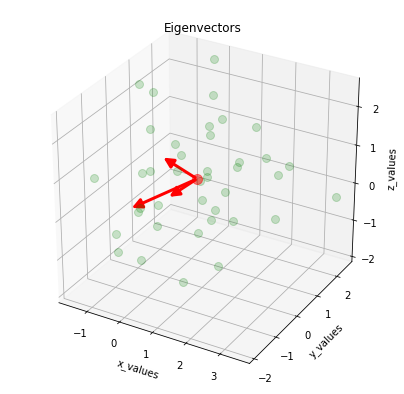

In [218]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(sample_all[0,:], sample_all[1,:], sample_all[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in vektor_eig_std.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

#### Nilai eigen yang diperoleh sebelumnya kemudian diurutkan dari yang tertingi hingga terendah. Masing-masing diurutkan bersama vektor eigennya.

#### Masing-masing vektor eigen yang telah diurutkan kemudian disusun secara horizontal menjadi sebuah matrix

In [219]:
pasangan_eigen = [(np.abs(nilai_eig_std[i]), vektor_eig_std[i]) for i in range(len(nilai_eig_std))]
pasangan_eigen.sort(key=lambda x:x[0], reverse=True)
matrix_w = np.hstack((pasangan_eigen[0][1].reshape(3,1), pasangan_eigen[1][1].reshape(3,1), pasangan_eigen[2][1].reshape(3,1)))

#### Data sample kemudian diproyeksikan ke arah bidang masing-masing sumbu vektor eigen dengan cara mengalikan dot produk matriks gabungan vektor eigen dengan data sample.

In [220]:
transformed = matrix_w.T.dot(sample_all)

#### Data sample di plot dalam grafik dua dimensi pada sumbu vektor eigen dengan nilai eigen tertinggi dapat dilakukan dengan cara berikut sehingga diperoleh grafik seperti pada gambar dibawah

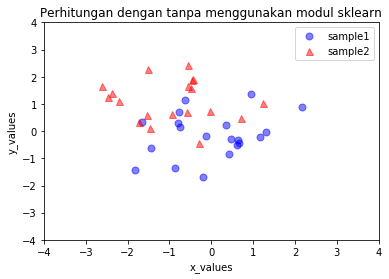

Dari hasil plot 2D terlihat data dengan sample1 cenderung berada disebelah kanan, sedangkan data sample2 berada disebelah kiri 


In [225]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='sample1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='sample2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Perhitungan dengan tanpa menggunakan modul sklearn')

plt.show()

print('Dari hasil plot 2D terlihat data dengan sample1 cenderung berada disebelah kanan, sedangkan data sample2 berada disebelah kiri ')

#### Dalam bahasa pemrograman python, perhitungan PCA dapat dilakukan dengan menggunakan modul sklearn.decomposisi PCA. Perhitungan dengan modul sklearn dapat dilakukan sebagai berikut.

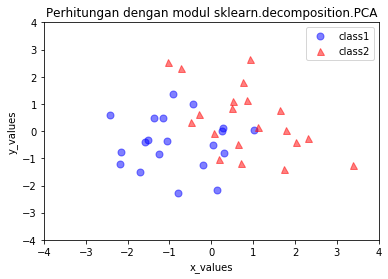

Dari perhitungan dengan modul sklearn.decomposisi terlihat hasil yang berbeda dari perhitungan sebelumnya, yang mana menunjukkan pola berkebalikan.
Hal ini karena perhitungan eigen vektor dengan nilai positif atau negatif. Sehingga hasil yang diperoleh dengan modul merupakan pencerminan hasil pada perhitungan sebelumnya


In [224]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(sample_all.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Perhitungan dengan modul sklearn.decomposition.PCA')

plt.show()

print('Dari perhitungan dengan modul sklearn.decomposisi terlihat hasil yang berbeda dari perhitungan sebelumnya, yang mana menunjukkan pola berkebalikan.')
print('Hal ini karena perhitungan eigen vektor dengan nilai positif atau negatif. Sehingga hasil yang diperoleh dengan modul merupakan pencerminan hasil pada perhitungan sebelumnya')

#### Untuk mendapatkan klasifikasi grafik dengan bentuk yang sama seperti pada perhitungan yang dilakukan sebelumnya tanpa menggunakan modul sklearn, maka nilai eigen vektornya dapat dikalikan dengan -1. Untuk melakukan perhitungan tersebut dapat dilakukan sebagi berikut

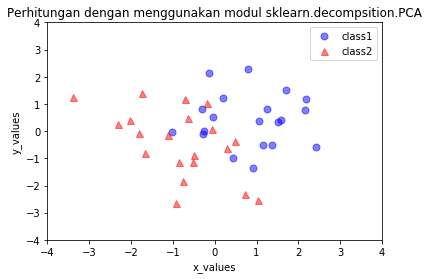

In [226]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Perhitungan dengan menggunakan modul sklearn.decompsition.PCA')
plt.show()